## Machine Translation using Attention Model - Freanch to English

- In Seq2Seq model, the input sequence is Encoded into a single context vector, and this context vector is used fed to Decoder which generates single token at a time.

- However, this architecture is not flexible, and also not scalable. For instance, in case of machine translation, it will be difficult to translate a long text (such as, translate multiple sentences at once) unlike human translation. (Because a single context will not be enough to represent entire text, when the text is so long.)

- By introducing `Attention` architecture, this limitation can be eliminated.The attention is more elaborative and widely used architecture in today's NLP, and a lot of tasks (such as, machine translation, smart reply, etc) are researched by adding attention mechanism and worked well today.

-The overview of `Attention` architecture is shown as follows.
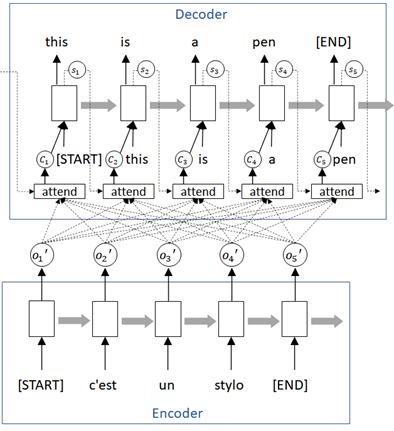

- The context vectors `c` computed for each token by Encoder is passed to attention layer of the decoder block, and the different context is then used in each units/time-step for decoding. (In the above diagram, each attend layer is the same network and then shares the weight's parameters.)

<math xmlns>
  <mo fence="false" stretchy="false">{</mo>
  <msubsup>
    <mi>&#x3B1;</mi>
    <mi>j</mi>
    <mi>i</mi>
  </msubsup>
  <mo fence="false" stretchy="false">}</mo>
  <mstyle>
    <mspace width="0.278em"></mspace>
  </mstyle>
  <mo stretchy="false">(</mo>
  <mi>i</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <mi>n</mi>
  <mo stretchy="false">)</mo>
</math>
which is also called `Attention` weight means an alignment's weight at j-th time step for each source sequence outputs,
<math>
  <msubsup>
    <mi>o</mi>
    <mn>1</mn>
    <mrow data-mjx-texclass="ORD">
      <mi data-mjx-alternate="1">&#x2032;</mi>
    </mrow>
  </msubsup>
  <mo>,</mo>
  <msubsup>
    <mi>o</mi>
    <mn>2</mn>
    <mrow data-mjx-texclass="ORD">
      <mi data-mjx-alternate="1">&#x2032;</mi>
    </mrow>
  </msubsup>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <msubsup>
    <mi>o</mi>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mi data-mjx-alternate="1">&#x2032;</mi>
    </mrow>
  </msubsup>
</math>

And it finally generates context
<math >
  <msub>
    <mi>C</mi>
    <mi>j</mi>
  </msub>
</math>
 at j-th time step by 
 <math>
  <msub>
    <mi>c</mi>
    <mi>j</mi>
  </msub>
  <mo>=</mo>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>i</mi>
    <mi>n</mi>
  </munderover>
  <msubsup>
    <mi>&#x3B1;</mi>
    <mi>j</mi>
    <mi>i</mi>
  </msubsup>
  <mo>&#x22C5;</mo>
  <msubsup>
    <mi>o</mi>
    <mi>i</mi>
    <mrow data-mjx-texclass="ORD">
      <mi data-mjx-alternate="1">&#x2032;</mi>
    </mrow>
  </msubsup>
</math>

#### `Attention (Soft Attention)` layer details
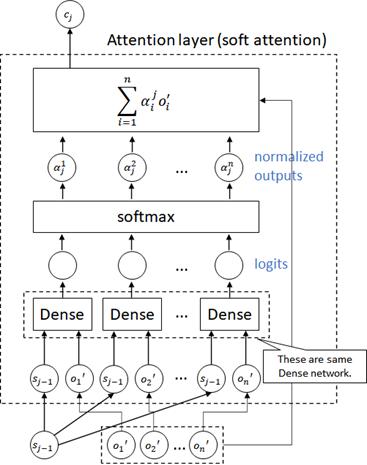

<div class="alert alert-block alert-info">
This architecture is called Soft-Attention, which is the first attention introduced in the context of sequence-to-sequence generation. (See Bahdanau et al.)
There exist a lot of variants in attention architecture. Ex: the famous scaled dot-product Attention (and self-attention) used in transformer:
 </div>
 
With this Attention layer, network can focus on specific components in source sequence.
For instance, in case of the following French-to-English machine translation, the 3rd units in sequence ("don't" in English) will strongly focus on 3rd and 5th components in original sequence (French), because the word "don't" will be strongly related to "ne" and "pas" in French. On the other hand, the components "je" and "comprends" in French are weakly referred, because it's not directly related to "don't" in English, but it's used only for determining "doesn't" or not "isn't".
As a result, the attention weights 
<math>
  <mo fence="false" stretchy="false">{</mo>
  <msubsup>
    <mi>&#x3B1;</mi>
    <mi>j</mi>
    <mi>i</mi>
  </msubsup>
  <mo fence="false" stretchy="false">}</mo>
  <mstyle>
    <mspace width="0.278em"></mspace>
  </mstyle>
  <mo stretchy="false">(</mo>
  <mi>i</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mo>&#x2026;</mo>
  <mo>,</mo>
  <mi>n</mi>
  <mo stretchy="false">)</mo>
</math>
will be larger for the source components "ne" and "pas", and will be smaller for the source components "je" and "comprends".
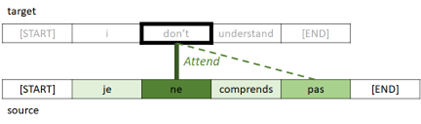 

<b>
    <hr> </b>

In [61]:
#!pip install torch==1.13.1 torchtext==0.14.1 --extra-index-url https://download.pytorch.or
# !pip install torch==1.13.1 torchtext==0.14.1
# !pip install numpy nltk
# !wget http://www.manythings.org/anki/fra-eng.zip
# !unzip fra-eng.zip -d fra-eng

### Dataset Preparation
Engligh-French dataset by [Anki] https://www.manythings.org/anki/

In [2]:
#!wget http://www.manythings.org/anki/fra-eng.zip
#!unzip fra-eng.zip -d fra-eng

In [3]:
!head -n 5 fra-eng/fra.txt

Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
Go.	Marche.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)
Go.	En route !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8267435 (felix63)
Go.	Bouge !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)
Hi.	Salut !	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)


In [4]:
!wc -l fra-eng/fra.txt

227815 fra-eng/fra.txt


In [5]:
from pathlib import Path
import numpy as np

import nltk
import nltk.data

import string

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

import torch
from torch.utils.data import DataLoader

import torch.nn as nn

<hr>

In [6]:
np.random.seed(42)
torch.manual_seed(42)

In [7]:
pathobj = Path("fra-eng/fra.txt")
text_all = pathobj.read_text(encoding="utf-8")
lines = text_all.splitlines()
print(f'No. of lines in the file: {len(lines)}')

No. of lines in the file: 227815


In [8]:
train_data_raw = [line.split("\t") for line in lines]
# only select column 1 and 0 in the order.
# IMP: Keeping in this order will make Frn column then Eng column.
train_data_raw = np.array(train_data_raw)[:,[1,0]]
# print first row
train_data_raw[0]

array(['Va !', 'Go.'], dtype='<U349')

## Note:
- Whole data is considered a training data
- The text length in the dataset is longer (and includes multiple sentences) in later part. Shuffle entire data.

In [9]:
np.random.shuffle(train_data_raw)
train_data_raw[0]

array(['Je voulais simplement te rendre heureuse.',
       'I just wanted to make you happy.'], dtype='<U349')

In [10]:
# Punkt tokenizer is alreay downloaded previously
tokenizer_en = nltk.data.load("tokenizers/punkt/english.pickle")
tokenizer_fr = nltk.data.load("tokenizers/punkt/french.pickle")
fr_list = []
en_list = []

In [11]:
for x in train_data_raw:
    x1 = tokenizer_fr.tokenize(x[0])
    x2 = tokenizer_en.tokenize(x[1])
    # don't use data if it consists of multiple sentences.
    # Eng --> No. of sentence == Frn --> No. of sentence
    if len(x1) == len(x2):
        fr_list += x1
        en_list += x2
    #Debug code
    #else:
    #    print(x1)
    #    print(x2)
    #    break

In [12]:
train_data = np.column_stack((fr_list, en_list))

In [13]:
print(f'0th: {train_data[0]}')
print(f'1st: {train_data[1]}')

0th: ['Je voulais simplement te rendre heureuse.'
 'I just wanted to make you happy.']
1st: ['Nous ne pouvons être les deux seules personnes à être en retard.'
 "We can't be the only two people who're late."]


#### Make more clean-up in the dataset

In [14]:
train_data = np.char.lower(train_data)
train_data = np.char.replace(train_data, "-", " ")
# Remove all punctuation except " ' " (e.g, don't)
#     1. Get punctutaion present in string.punctuation
#     2. Remove "'" from string.punctuation string.
for x in string.punctuation.replace("'", ""):
    train_data = np.char.replace(train_data, x, "")

In [15]:
train_data[0]

array(['je voulais simplement te rendre heureuse',
       'i just wanted to make you happy'], dtype='<U250')

In [16]:
# There are some sentence having << & >>. Remove them as well.
for x in "«»":
    train_data = np.char.replace(train_data, x, "")
train_data = np.char.strip(train_data)

In [17]:
# Add <start> and <end> tokens in string.
train_data = \
np.array([[" ".join(["<start>", x, "<end>"]), " ".join(["<start>", y, "<end>"])] for x, y in train_data])
train_data[0]

array(['<start> je voulais simplement te rendre heureuse <end>',
       '<start> i just wanted to make you happy <end>'], dtype='<U264')

#### Generate sequence inputs
Note: max_word = 10000
- Generate vocab for both Eng & Frn
- Generate the sequence of word's indices (i.e, tokenize) from text.
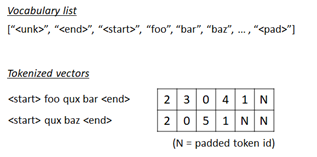

In [18]:
max_word = 10000

# create space-split tokenizer
tokenizer = get_tokenizer(None)

# define tokenization function
def yield_tokens(data):
    for text in data:
        tokens = tokenizer(text)
        yield tokens

In [19]:
# build vocabulary list for French
vocab_fr = build_vocab_from_iterator(
    yield_tokens(train_data[:,0]),
    specials=["<unk>"],
    max_tokens=max_word
)
vocab_fr.set_default_index(vocab_fr["<unk>"])

In [20]:
# build vocabulary list for English
vocab_en = build_vocab_from_iterator(
    yield_tokens(train_data[:,1]),
    specials=["<unk>"],
    max_tokens=max_word
)
vocab_en.set_default_index(vocab_en["<unk>"])

In [21]:
print(f'Frn Vocab size: {vocab_fr.__len__()}')

Frn Vocab size: 10000


In [22]:
print(f'Eng Vocab size: {vocab_en.__len__()}')

Eng Vocab size: 10000


In [23]:
# The generated token index is 0, 1, ... , vocab_size - 1.
# Set vocab_size as a token id in padded positions for both French and English respctively.
pad_index_fr = vocab_fr.__len__()
vocab_fr.append_token("<pad>")

pad_index_en = vocab_en.__len__()
vocab_en.append_token("<pad>")

In [24]:
pad_index_fr

10000

In [25]:
print(f'Frn Vocab size: {vocab_fr.__len__()}')

Frn Vocab size: 10001


In [26]:
pad_index_en

10000

In [27]:
print(f'Eng Vocab size: {vocab_en.__len__()}')

Eng Vocab size: 10001


In [28]:
# Get list for index-to-word / word-to-index.
itos_fr = vocab_fr.get_itos()
stoi_fr = vocab_fr.get_stoi()

itos_en = vocab_en.get_itos()
stoi_en = vocab_en.get_stoi()

In [29]:
print("# of token index in French (source) is {}.".format(vocab_fr.__len__()))
print("The padded index in French (source) is {}.".format(stoi_fr["<pad>"]))
print("=============================================")
print("# of token index in English (target) is {}.".format(vocab_en.__len__()))
print("The padded index in English (target) is {}.".format(stoi_en["<pad>"]))

# of token index in French (source) is 10001.
The padded index in French (source) is 10000.
# of token index in English (target) is 10001.
The padded index in English (target) is 10000.


In [30]:
train_data[22824]

array(['<start> tom est arrivé en avance <end>',
       '<start> tom came early <end>'], dtype='<U264')

In [31]:
# test
test_fr_text = "<start> est ce que tu sais pourquoi <end>"
vocab_fr(tokenizer(test_fr_text))

[2, 16, 15, 6, 12, 58, 66, 1]

In [32]:
# test
test_en_text = "<start> do you know why <end>"
vocab_en(tokenizer(test_en_text))

[2, 11, 4, 30, 62, 1]

#### collator function that  is used for pre-processing in data loader.

`Important:`
- During training, the decoder predicts the next word in target (English) sequence using the current word's sequence (English) and the encoded context of source (French).
- Hence, for target (English) sequence, we separate into features (x) and labels (y). In another words, separate target sequence into the sequence iteself (x) and the following label (y).

Ex:
actual eng token: `[2, 11, 4, 30, 62, 1]`

After above mentioned step:

x : `[2, 11, 4, 30, 62, 1]`
y : `[11, 4, 30, 62, 1, -100]`

Note : Here we set -100 as an unknown label id, because PyTorch cross-entropy function (`torch.nn.functional.cross_entropy())` has a property ignore_index which default value is -100.

In [33]:
batch_size=64
seq_len_fr = 45
seq_len_en = 38

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, feature_source_list, feature_target_list = [], [], []
    for text_fr, text_en in batch:
        # (1) tokenize to a list of word's indices
        tokens_fr = vocab_fr(tokenizer(text_fr))
        tokens_en = vocab_en(tokenizer(text_en))
        # (2) separate into features and labels in target tokens (English)
        y = tokens_en[1:]
        y.append(-100)
        # (3) limit length to seq_len
        y = y[:seq_len_en]
        tokens_fr = tokens_fr[:seq_len_fr]
        tokens_en = tokens_en[:seq_len_en]
        # (4) pad sequence
        y += [-100] * (seq_len_en - len(y))
        tokens_fr += [pad_index_fr] * (seq_len_fr - len(tokens_fr))
        tokens_en += [pad_index_en] * (seq_len_en - len(tokens_en))
        # add to list
        label_list.append(y)
        feature_source_list.append(tokens_fr)
        feature_target_list.append(tokens_en)
    # convert to tensor
    label_list = torch.tensor(label_list, dtype=torch.int64).to(device)
    feature_source_list = torch.tensor(feature_source_list, dtype=torch.int64).to(device)
    feature_target_list = torch.tensor(feature_target_list, dtype=torch.int64).to(device)
    return label_list, feature_source_list, feature_target_list

# train_data: ['French sentence', 'English sentence']
dataloader = DataLoader(
    list(zip(train_data[:,0], train_data[:,1])),
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)

In [34]:
train_data[:,0]

array(['<start> je voulais simplement te rendre heureuse <end>',
       '<start> nous ne pouvons être les deux seules personnes à être en retard <end>',
       '<start> je sais que tom était malade <end>', ...,
       '<start> voulez vous un petit déjeuner <end>',
       '<start> nous travaillons aussi vite que nous le pouvons <end>',
       "<start> ça a l'air plutôt cher <end>"], dtype='<U264')

In [35]:
# test code: Notice the 'break'
for labels, sources, targets in dataloader:
    break

print("label shape in a batch : {}".format(labels.size()))
print("feature source/Frn shape in a batch : {}".format(sources.size()))
print("feature target/Eng shape in a batch : {}".format(targets.size()))
print("\n***** label sample *****")
print(labels[0])
print("\n***** features (source) sample *****")
print(sources[0])
print("\n***** features (target) sample *****")
print(targets[0])

label shape in a batch : torch.Size([64, 38])
feature source/Frn shape in a batch : torch.Size([64, 45])
feature target/Eng shape in a batch : torch.Size([64, 38])

***** label sample *****
tensor([  41,   39,    4,   33,    6,  412,    1, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100])

***** features (source) sample *****
tensor([    2,    78,    16,    15,     6,    12,    53,   288,    10,   428,
            1, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
        10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
        10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
        10000, 10000, 10000, 10000, 10000])

***** features (target) sample *****
tensor([    2,    41,    39,     4,    33,     6,   412,     1, 10000, 10000,
        10000, 10000, 10000, 10000, 100

<hr>

`(inputs != padding_idx)`
-  Gives a binary tensor where each element is 1 if the corresponding element in inputs is not equal to padding_idx and 0 if it is equal to padding_idx.
- int(): converts Bool to Int

<hr>

### `Build Network with Attention`

Build an `Attention` model in encoder-decoder architecture as follows.

- Outputs/Context Vector (not only final output, but all outputs - for each tokem in input sequence) in RNN for source French text are generated in encoder.
- Encoder's outputs are used in attention architecture and the result is passed to unit decoder's RNN.
- Each RNN output in decoder is passed into dense (FC) layer and generate the sequence of next words.
- Calculate loss between predicted next words and the true values of next words, and then proceed to optimize neural networks.
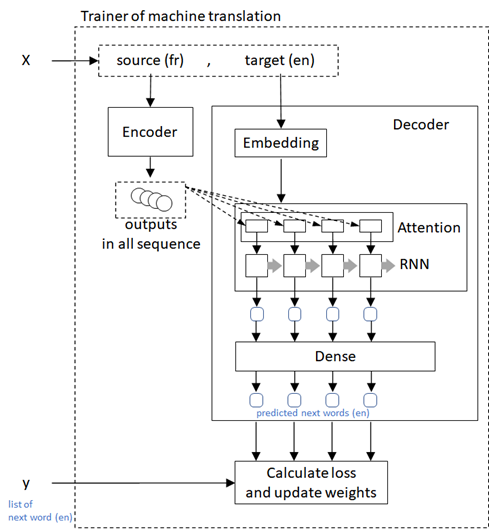

- Unlike vanilla encoder-decoder, all hidden states (calculated for each token for the input sequence) are used in the decoder, hence the encoder would return all outputs (not only the final output).
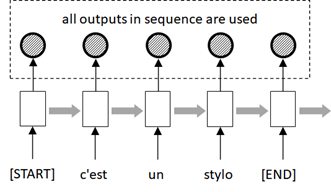

`Note:` the size of the following masks output is (batch_size, seq_len), in which its element's value is 0 when it's a padded position, and otherwise 1. (This masks will then be used in the following softmax operation in decoder side.)

### `Encoder`

In [36]:
embedding_dim = 256
hidden_size = 1024 # the number of features in the hidden state h

class Encoder(nn.Module):
    def __init__(self, vocab_size, seq_len, embedding_dim, hidden_size, padding_idx):
        super().__init__()
        self.seq_len = seq_len
        self.padding_idx = padding_idx

        self.embedding = nn.Embedding(
            vocab_size,
            embedding_dim,
            padding_idx=padding_idx,
        )
        self.rnn = nn.GRU(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
        )

    def forward(self, inputs):
        # embedding
        #   --> (batch_size, seq_len, embedding_dim)
        outs = self.embedding(inputs)
        # build "lengths" property to pack inputs
        masks = (inputs != self.padding_idx).int()
        lengths = masks.sum(dim=1, keepdim=False)
        # pack inputs for RNN
        #    It removes padding elements from sequences, making computations faster
        #    and avoiding unnecessary calculations on padding tokens.
        packed_inputs = torch.nn.utils.rnn.pack_padded_sequence(
            outs, # padded batch of variable length sequences
            lengths.cpu(), #list of sequence lengths of each batch element (must be on the CPU if provided as a tensor).
            batch_first=True,
            enforce_sorted=False,
        )
        # apply RNN
        packed_outs, packed_hidden_state = self.rnn(packed_inputs)
        # unpack results
        #   --> (batch_size, seq_len, hidden_size)           
        outs, _ = torch.nn.utils.rnn.pad_packed_sequence(
            packed_outs,
            batch_first=True,
            padding_value=0.0,
            total_length=self.seq_len,
        )
        return outs, masks

enc_model = Encoder(
    vocab_size=vocab_fr.__len__(),
    seq_len=seq_len_fr,
    embedding_dim=embedding_dim,
    hidden_size=hidden_size,
    padding_idx=pad_index_fr).to(device)

### `Decoder with Attention layer`

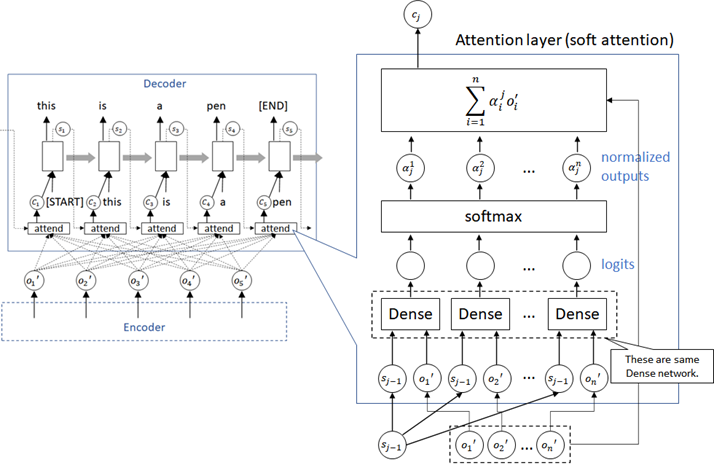

- In each time-steps in target sequence, the state in previous step is used in computation of attention layer, and it repeats this process until the end of sequence. (See the following `for` loop.)

- In each steps, first, the previous state and encoder's outputs are concatenated, and the results are passed into dense network (FC) layer.
- By applying softmax function for this output, the attention weights (`alpha` in the following code) at `j`-th step are obtained. The context `c` at `j`-th step is then generated by
<math>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>i</mi>
  </munder>
  <msub>
    <mi>&#x3B1;</mi>
    <mi>i</mi>
  </msub>
  <msubsup>
    <mi>o</mi>
    <mi>i</mi>
    <mrow data-mjx-texclass="ORD">
      <mi data-mjx-alternate="1">&#x2032;</mi>
    </mrow>
  </msubsup>
</math>
 where is i-th element in encoder's outputs.
In the following code, the padded elements in the softmax operation will be ignored (masked), because
<math>
  <msup>
    <mi>e</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mi>i</mi>
      <mi>n</mi>
      <mi>f</mi>
    </mrow>
  </msup>
  <mo>=</mo>
  <mn>0</mn>
</math>
.

- Once we get the context `c`, the subsequent steps are the same as Seq2Seq model.


In [37]:
from torch.nn import functional as F

class DecoderWithAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, padding_idx, hidden_dim1=1024, hidden_dim2=1024):
        super().__init__()

        self.padding_idx = padding_idx
        self.hidden_size = hidden_size

        # Below are used in attention layer
        self.attention_dense1 = nn.Linear(hidden_size*2, hidden_dim1)
        self.attention_dense2 = nn.Linear(hidden_dim1, 1)

        self.embedding = nn.Embedding(
            vocab_size,
            embedding_dim,
            padding_idx=padding_idx,
        )
        self.rnncell = nn.GRUCell(
            input_size=hidden_size + embedding_dim,
            hidden_size=hidden_size,
        )
        # Below are used in Decoder's output
        self.output_dense1 = nn.Linear(hidden_size, hidden_dim2)
        self.output_dense2 = nn.Linear(hidden_dim2, vocab_size)

    def forward(self, inputs, enc_outputs, enc_masks, states=None, return_states=False):
        # get size
        batch_size = inputs.size()[0]
        dec_seq_size = inputs.size()[1]
        enc_seq_size = enc_outputs.size()[1]

        # set initial states
        if states is None:
            current_states = torch.zeros((batch_size, self.hidden_size)).to(device)
        else:
            current_states = states

        # loop target sequence
        #   [Note] Here I loop in all time-steps, but please filter
        #   for saving resource's consumption.
        #   (Sort batch, run by filtering, and turn into original position.)
        rnn_outputs = []
        for j in range(dec_seq_size):
            # process attention

            #   --> (batch_size, 1, hidden_size)
            current_states_reshaped = current_states.unsqueeze(dim=1)
            #   --> (batch_size, enc_seq_size, hidden_size)
            current_states_reshaped = current_states_reshaped.expand(-1, enc_seq_size, -1)
            # concat
            #   --> (batch_size, enc_seq_size, hidden_size * 2)
            enc_and_states = torch.concat((current_states_reshaped, enc_outputs), dim=-1)
            # apply dense
            #   --> (batch_size, enc_seq_size, 1)
            alpha = self.attention_dense1(enc_and_states)
            alpha = F.relu(alpha)
            alpha = self.attention_dense2(alpha)
            #   --> (batch_size, enc_seq_size)
            alpha = alpha.squeeze(dim=2)
            # apply masked
            #    - enc_mask tensor if filled with 0 wherever it is padded.
            #    - masked_fill() will put "-inf" wherever tensor element is 0.
            #    - softmax of "-int" is zero.
            alpha = alpha.masked_fill(enc_masks == 0, float("-inf"))
            # apply softmax
            alpha = F.softmax(alpha, dim=-1)
            # get context
            #   --> (batch_size, hidden_size)
            #      EinsteinSum:
            #                 Tensor1-bxs
            #                 Tensor2-bxsxu
            #                 output dim: bxu
            c = torch.einsum("bs,bsu->bu", alpha, enc_outputs)

            # process rnn

            # embedding
            #   --> (batch_size, embedding_dim)
            emb_j = self.embedding(inputs[:,j])
            # concat
            #   --> (batch_size, hidden_size + embedding_dim)
            input_j = torch.concat((c, emb_j), dim=-1)
            # apply rnn (proceed to the next state)
            current_states = self.rnncell(input_j, current_states)
            # append state
            rnn_outputs.append(current_states)

        # process outputs

        # get output state's tensor
        #   --> (batch_size, dec_seq_size, hidden_size)
        rnn_outputs = torch.stack(rnn_outputs, dim=1)
        # apply dense
        #   --> (batch_size, dec_seq_size, vocab_size)
        outs = self.output_dense1(rnn_outputs)
        outs = F.relu(outs)
        logits = self.output_dense2(outs)

        # return results
        if return_states:
            # set 0.0 in padded position
            masks = (inputs != self.padding_idx).int()
            masks = masks.unsqueeze(dim=2)
            masks = masks.expand(-1, -1, self.hidden_size)
            rnn_outputs = rnn_outputs.masked_fill(masks == 0, 0.0)
            return logits, rnn_outputs  # This is used in prediction
        else:
            return logits               # This is used in training

dec_model = DecoderWithAttention(
    vocab_size=vocab_en.__len__(),
    embedding_dim=embedding_dim,
    hidden_size=hidden_size,
    padding_idx=pad_index_en).to(device)

### Train

- `The loss on label id=-100 is ignored in cross_entropy() function. The padded position and the end of sequence will then be ignored in optimization.`

In [38]:
num_epochs = 1#5

all_params = list(enc_model.parameters()) + list(dec_model.parameters())
optimizer = torch.optim.AdamW(all_params, lr=0.001)
for epoch in range(num_epochs):
    for labels, sources, targets in dataloader:
        # optimize
        optimizer.zero_grad()
        enc_outputs, enc_masks = enc_model(sources)
        logits = dec_model(targets, enc_outputs, enc_masks)
        loss = F.cross_entropy(logits.transpose(1,2), labels)
        loss.backward()
        optimizer.step()
        # calculate accuracy
        pred_labels = logits.argmax(dim=2)
        num_correct = (pred_labels == labels).float().sum()
        num_total = (labels != -100).float().sum()
        accuracy = num_correct / num_total
        print("Epoch {} - loss: {:2.4f} - accuracy: {:2.4f}".format(epoch+1, loss.item(), accuracy), end="\r")
    print("")

Epoch 1 - loss: 1.0476 - accuracy: 0.7381


<hr>

### Translate Text

- All these sentences are not in training set.
- Several brief sentences are used here, but the metrics to evaluate text-generation task will not be so easy. (Because simply checking an exact match to a reference text is not optimal.)
- To eveluate the trained model, some common metrics available in text generation, such as, BLEU or ROUGE.

Note : Greedy search is used here and this will sometimes lead to wrong sequence.
       This has some drawbacks.

In [57]:
end_index_en = stoi_en["<end>"]
max_output = 128

def translate(sentence):
    # preprocess inputs
    text_fr = sentence
    text_fr = text_fr.lower()
    text_fr = " ".join(["<start>", text_fr, "<end>"])
    text_en = "<start>"
    _, tokens_fr, tokens_en = collate_batch(list(zip([text_fr], [text_en])))

    # process encoder
    enc_outputs, enc_masks = enc_model(tokens_fr)

    # process decoder
    final_state = None
    for loop in range(max_output):
        logits, states = dec_model(
            tokens_en,
            enc_outputs,
            enc_masks,
            states=final_state,
            return_states=True)
        #print(f'logits shape: {logits.shape} ; states shape: {states.shape}')
        final_state = states[0][0].unsqueeze(dim=0)
        pred_idx_en = logits[0][0].argmax()
        next_word_en = itos_en[pred_idx_en]
        text_en += " "
        text_en += next_word_en
        if pred_idx_en.item() == end_index_en:
            break
        _, _, tokens_en = collate_batch(list(zip(["<end>"], [next_word_en])))
    return text_en

In [58]:
print(translate("j'aime la guitare")) # i like guitar
print(translate("il vit au japon")) # he lives in Japan
print(translate("ce stylo est utilisé par lui")) # this pen is used by him
print(translate("c'est ma chanson préférée")) # that's my favorite song
print(translate("il conduit une voiture et va à new york")) # he drives a car and goes to new york

<start> i like the guitar <end>
<start> he lives in japan <end>
<start> this pen is a <unk> by him <end>
<start> it's my favorite song <end>
<start> he drives a car and goes to new york <end>


In [60]:
logits.shape

torch.Size([19, 38, 10001])